# Análisis Letras del Tesoro#

*Las Letras del Tesoro son títulos de deuda pública emitidos al descuento como forma de financiación del Estado, normalmente a corto plazo, y aunque son inversiones de renta fija no están exentas de cierto riesgo aunque menor en comparación con otros productos, por eso su rentabilidad suele ser menor también.*

*Que las letras estén emitidas al descuento significa que el valor nominal de la letra es de 1.000 euros, y su precio de compra estará por debajo de ese valor, la diferencia entre el valor de compra y venta nos determinará su rentabilidad.*

*Conociendo la teoría vamos crear un sistema que nos permita calcular la rentabilidad de las letras de forma rápida y sencilla para poder analizarlo y ver si nos interesa o no su adquisición*


In [1]:
pip install numpy-financial

In [43]:
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
C0 = float(input("Precio de compra de la letra(incluyendo gastos y comisiones): "))  #solicitamos el precio de compra
n = int(input("Vencimiento en meses: "))             #el vencimiento
Cn = 1000                                            #Al final siempre obtendremos el nominal, que son 1.000 euros
cf = []    #Vamos a generar nuestros flujos para calcular la rentabilidad

cf.append(-C0)   #Lo primero incorporar en negativo el desembolso inicial      

for i in range(1, n, 1):   #después vamos a rellenar con 0 los periodos entre el incio y el final
    cf.append(0)

cf.append(Cn)     #por último incorporamos el nominal

tir = (npf.irr(cf))*100  #Con la fórmula financiera IRR calculamos la rentabilidad de la Letra.

print("La rentabilidad de la letra es {} %".format(round(tir,2)))


Precio de compra de la letra(incluyendo gastos y comisiones): 950
Vencimiento en meses: 3
La rentabilidad de la letra es 1.72 %


In [12]:
def TIR(nper, pv, fv = 1000):
    cf = []   
    cf.append(-pv)        
    for i in range(1, nper, 1):   
        cf.append(0)

    cf.append(fv) 

    tir = (npf.irr(cf))*100
    return tir
    

In [38]:
class Letras:
    
    @property 
    def nper(self): return self._nper
    @nper.setter
    def nper(self, nper):
        if type(nper) == int and nper > 0:
            self._nper = nper
        else: print("Periodo debe ser > 0")
            
    @property
    def pv(self): return self._pv
    @pv.setter
    def pv(self, pv):
        if (type(pv) == int or type(pv) == float) and pv > 0:
            self._pv = pv
        else: print("El precio de compra debe ser > 0")
    
    def __init__(self, nper, pv, fv = 1000):                   
        self.nper = nper
        self.pv = pv                 
        self.fv = fv #al llamar a la función de inicio si no se pone esta cantidad no pasa nada.
        
    def TIR(self):
        tir = TIR(self.nper, self.pv, self.fv)
        return print("La rentabilidad de la letra es {} %".format(round(tir,2)))
    
    def TIRr(self):
        tir = TIR(self.nper, self.pv, self.fv)
        return tir
        

*Ejemplo de como funciona*

In [26]:
Letra1 = Letras(3,950)
Letra1.TIR()

La rentabilidad de la letra es 1.72 %


*Probemos con varias letras*

In [59]:
letra1 = Letras(6, 958)
letra2 = Letras(9, 879)
letra3 = Letras(6, 960)
letra4 = Letras(12, 898)
letra5 = Letras(3, 980)

In [60]:
rentabilidad = []

a = letra1.TIRr()
rentabilidad.append(a)

a = letra2.TIRr()
rentabilidad.append(a)

a = letra3.TIRr()
rentabilidad.append(a)

a = letra4.TIRr()
rentabilidad.append(a)

a = letra5.TIRr()
rentabilidad.append(a)

print(rentabilidad)

[0.7176881420101644, 1.443320963148742, 0.6826863266752081, 0.9005744103874003, 0.6756961723555666]


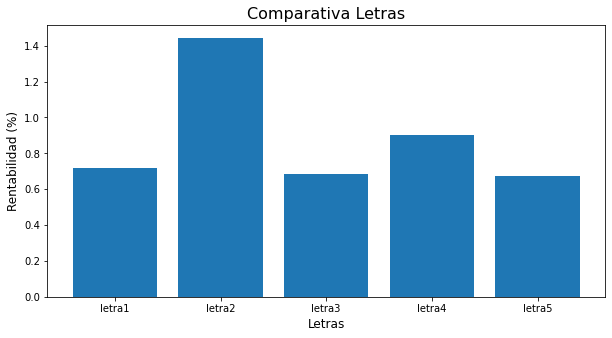

In [61]:
p = ['letra1', 'letra2', 'letra3', 'letra4', 'letra5']
plt.figure(figsize = (10, 5))
plt.bar(p, rentabilidad)
plt.title("Comparativa Letras", fontsize = 16)
plt.xlabel("Letras", fontsize = 12)
plt.ylabel("Rentabilidad (%)", fontsize=12)
plt.show()

En este caso, la letra más rentable es la 2

# Bonos y Obligaciones#

*Mientras que las Letras del Tesoro están pensadas como un producto a corto plazo (menos de 18 meses), los bonos se emiten a largo plazo (entre 3 y 5 años) y las obligaciones a más largo plazo (10, 15 ó 30 años), por tanto funcionan de una forma parecida a los depósitos, solo que la emisión de deuda se hace en múltiplos de 1.000 euros.*

*Además, la contratación de Bonos u Obligaciones no se realiza a descuento, sino que se ofrece un tipo de interes al que se será remunerado anualmente la inversión, es decir, si contratas un bono a 3 años, cada año se abonarán unos intereses a una rentabilidad previamente fijada, se denomina **Cupón**. Por tanto su funcionamiento es similar a los depósitos, solo que los intereses están calculados mediante interés simple*

**De momento voy a dejar este apartado pendiente**